Two-dimensional signals are mathematical functions of two variables, which are generally shown as R(x, y). Two-dimensional Fourier transform is a transformation that is applied to two-dimensional signals and transforms them from the spatial domain leads to the frequency or spectral domain. In this report we seek to show a few cases of well-known two-dimensional signals in the spatial domain and their Fourier transform in the frequency domain. These signals are Exponential Decay, Peak, Gaussian, Pyramid and Rectangle.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift, fft2
from scipy.signal import convolve2d, convolve
from scipy.stats import multivariate_normal
from matplotlib import cm
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Rectangle Signal

Original Signal Equation: 
\begin{equation}
R_{a,b}(x,y) = \frac{1}{4ab}  u(a^2 - x^2) u (b^2 - y^2)
\end{equation}

where u is the step function, a and b are the parameters, width and height of the rectangle. And Fourier Transform Equation is:

\begin{equation}
(\frac{sin(2\pi a f_x)}{\pi a f_x})(\frac{sin(2\pi b f_y)}{\pi b f_y})
\end{equation}

In [84]:
def plot_function(X, Y, Z, title):
    
    """
    Plot the surface
    
    Parameters:
    -----------
    X,Y : array_like
    The Coordinates of the 2D plot
    Z : array_like
    The height of the plot
    """
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='binary', edgecolor='none')
    ax.set_title(title)
    
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(Z)
    ax.set_title('Image View')
    ax.axis('off')
    plt.show()
    
def signal_rectangle(X,Y, a, b):
    
    """
    Rectangle Signal plot function
    
    INPUTS:
    --------
    X, Y: numpy array, The coordinates, array of integer variables
    a, b: integer, parameters to configure the signal
    
    OUTPUT:
    -------
    value of the signal
    """
    
    Z = (1/ (4 * a * b)) *np.heaviside(np.power(a,2) - np.power(X,2),1) *np.heaviside(np.power(b,2) - np.power(Y,2),1);
    return Z

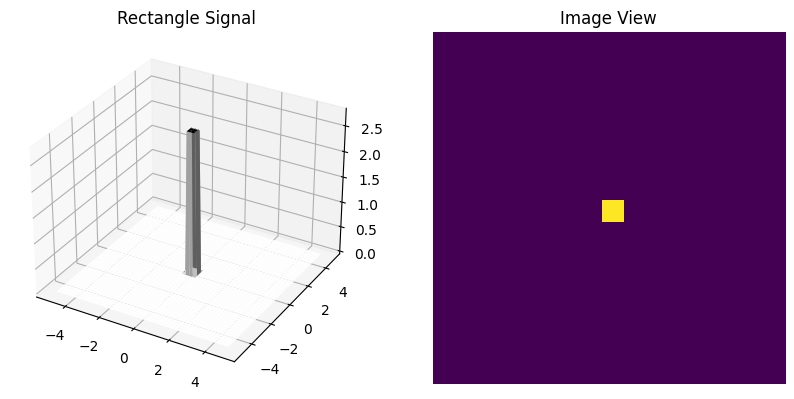

In [85]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y, sparse=True) 
a = 0.3
b = 0.3

Z = signal_rectangle(X,Y,a,b)
plot_function(X,Y,Z,title="Rectangle Signal")

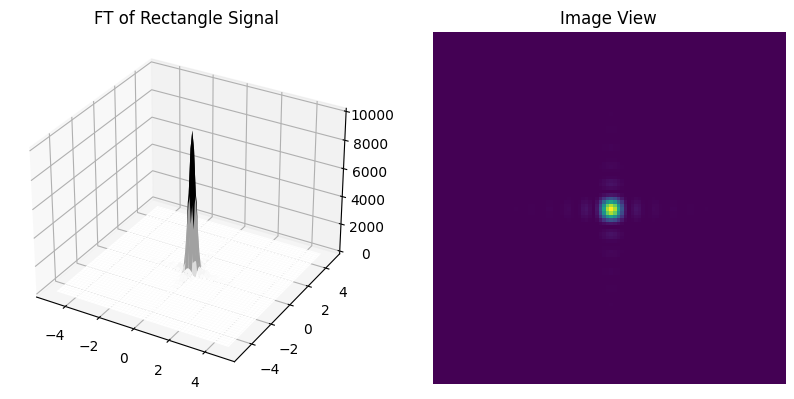

In [99]:
fft_points = np.fft.fft2(Z)
fft_points_shifted = np.fft.fftshift(fft_points)
fft_points_shifted_absolute = abs(fft_points_shifted)

plot_function(X,Y,fft_points_shifted_absolute,title="FT of Rectangle Signal")

# Pyramid Signal

The Pyramid signal is the convolution of the Rectangle signal
\begin{equation}
R_{a,b}(x,y) \circledast R_{a,b}(x,y)
\end{equation}

And the fourier transform of it is again the same but with power of 2

\begin{equation}
\bigg( (\frac{sin(2\pi a f_x)}{\pi a f_x})(\frac{sin(2\pi b f_y)}{\pi b f_y})\bigg )^2
\end{equation}

In [100]:
def signal_pyramid(X,Y, a, b):
    
    """
    Pyramid Signal plot function
    
    INPUTS:
    --------
    X, Y: numpy array, The coordinates, array of integer variables
    a, b: integer, parameters to configure the signal
    
    OUTPUT:
    -------
    value of the signal
    """
    
    rec_signal = (1/ (4 * a * b)) *np.heaviside(np.power(a,2) - np.power(X,2),1) *np.heaviside(np.power(b,2) - np.power(Y,2),1)
    Z = convolve2d(rec_signal,rec_signal,mode='same')
    return Z

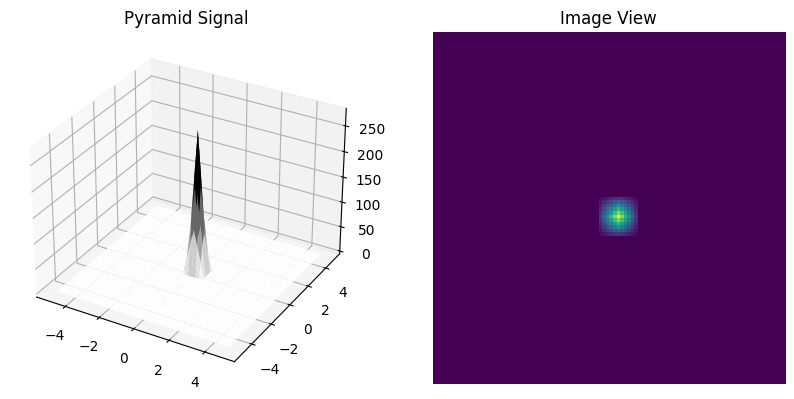

In [105]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y, sparse=True) 
a = 0.3
b = 0.3

Z = signal_pyramid(X,Y,a,b)
plot_function(X,Y,Z,title="Pyramid Signal")

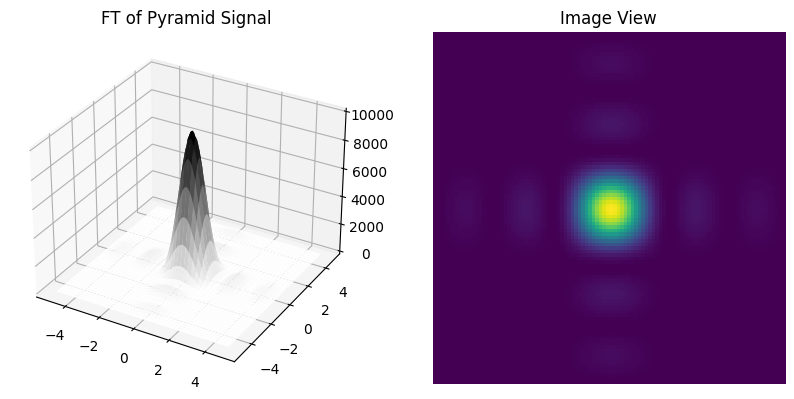

In [106]:
fft_points = np.fft.fft2(Z)
fft_points_shifted = np.fft.fftshift(fft_points)
fft_points_shifted_absolute = abs(fft_points_shifted)

plot_function(X,Y,fft_points_shifted_absolute,title="FT of Pyramid Signal")

# Gaussian Signal

\begin{equation}
g_{2D}(r, \sigma) = \frac{1}{2 \pi \sigma^2} exp(-\frac{r^2}{2 \sigma^2})
\end{equation}

And its Fourier transform is:
    
\begin{equation}
G_{2D}(f, \sigma) = exp(-2 \pi^2 f^2 \sigma^2)
\end{equation}

In [112]:
def signal_gaussian(X, Y, sigma):
    
    """
    Plot Multivariate Gaussian signal

    INPUTS:
    --------
    X, Y: array_like
        the input coordinates of a signal
    sigma: float, variance**2
    
    OUTPUT:
    -------
    value of the signal
    """
    r = np.sqrt(X **2 + Y**2)
    Z = (1/(2* np.pi * sigma**2)) * np.exp(- np.power(r,2) / 2* sigma**2)
    return Z

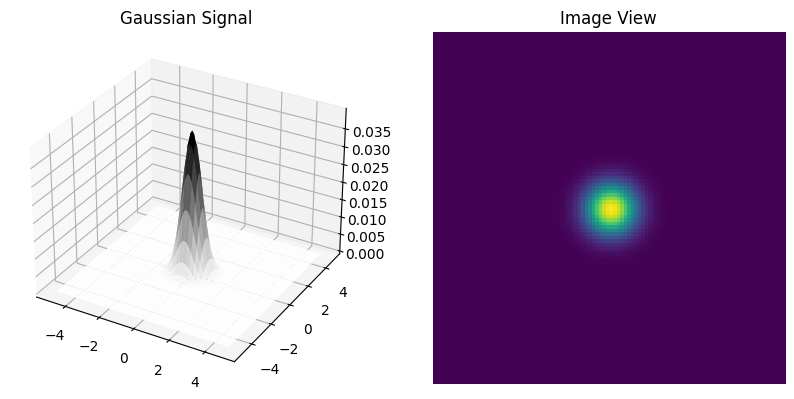

In [120]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y, sparse=True) 

Z = signal_gaussian(X,Y,sigma=2)
plot_function(X,Y,Z,title="Gaussian Signal")

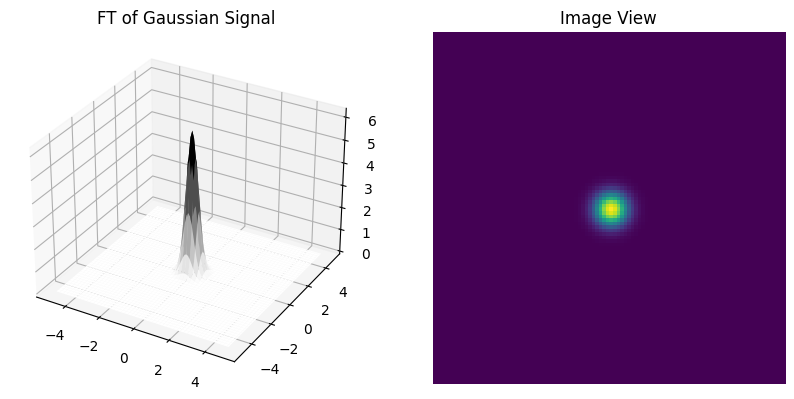

In [121]:
fft_points = np.fft.fft2(Z)
fft_points_shifted = np.fft.fftshift(fft_points)
fft_points_shifted_absolute = abs(fft_points_shifted)

plot_function(X,Y,fft_points_shifted_absolute,title="FT of Gaussian Signal")

# Peak Signal

The equations for a signal called Peak is as

\begin{equation}
\frac{1}{r}
\end{equation}

And The Fourier Transform of it is

\begin{equation}
\frac{1}{f}
\end{equation}

In [123]:
def signal_peak(X, Y):
    
    """
    Plot the Peak signal

    Parameters:
    -------
    X, Y: array_like
        the input coordinates of a signal

    OUTPUT:
    -------
    value of the signal
    """
    r = np.sqrt(X **2 + Y**2)
    Z = np.divide(1, r)
    
    return Z

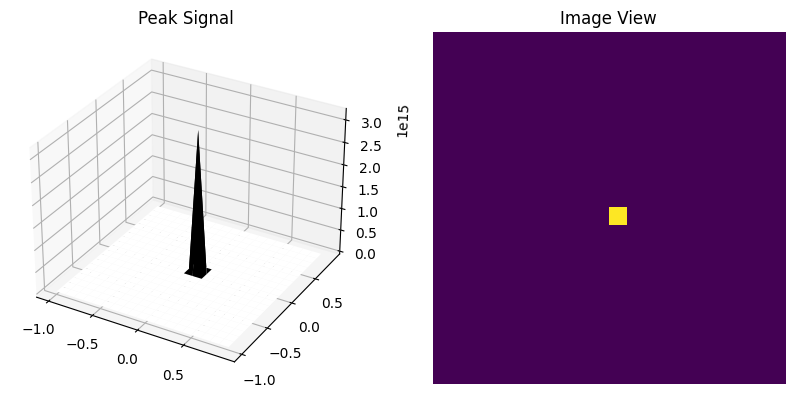

In [139]:
x = np.arange(-1, 1, 0.1)
y = np.arange(-1, 1, 0.1)
X, Y = np.meshgrid(x, y, sparse=True) 

Z = signal_peak(X,Y)
plot_function(X,Y,Z,title="Peak Signal")

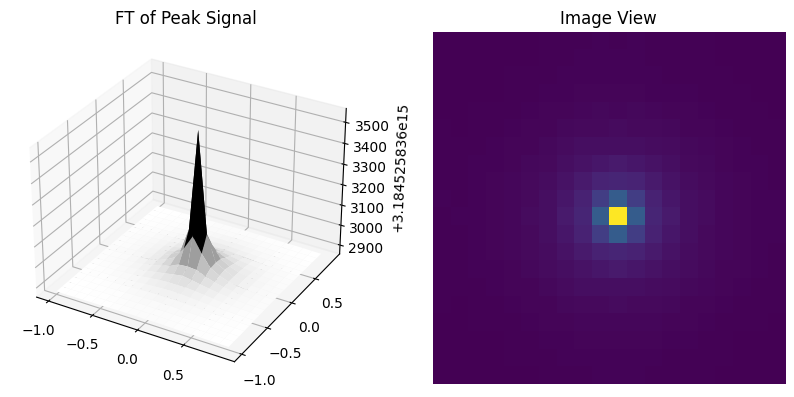

In [140]:
fft_points = np.fft.fft2(Z)
fft_points_shifted = np.fft.fftshift(fft_points)
fft_points_shifted_absolute = abs(fft_points_shifted)

plot_function(X,Y,fft_points_shifted_absolute,title="FT of Peak Signal")

# Exponential Decay Signal

The equation for this signal is
\begin{equation}
e^{ar}
\end{equation}

And the fourier transform can be

\begin{equation}
\frac{2 \pi a}{(w^2 + a^2)^{\frac{3}{2}}}
\end{equation}

In [164]:
def signal_exponential_decay(X, Y, a):
    
    """
    plot the The exponential decay signal with specified parameters, equation (9)

    INPUTS:
    -------
    X, Y: array_like
        the input coordinates of a signal
    a: (float or integer), additional parameter

    OUTPUT:
    -------
    value of the signal
    """
    r = np.sqrt(X **2 + Y**2)
    Z = fftshift(np.power(np.e, (a*r)))
    Z = np.exp(np.multiply(-1,np.multiply(a,np.sqrt(np.power(X,2)+np.power(Y,2)))))
    return Z

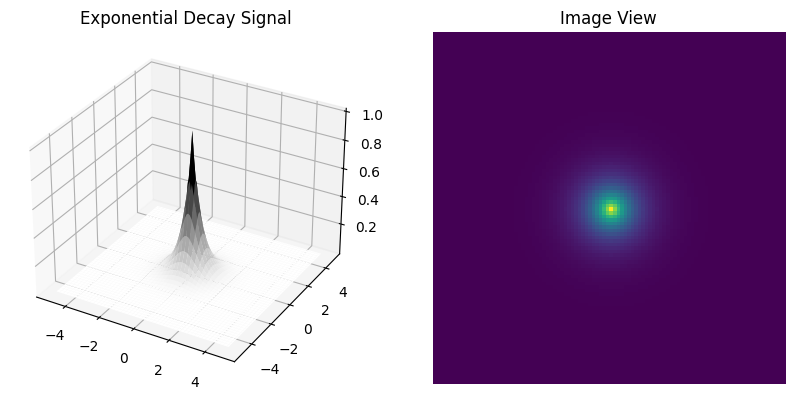

In [165]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y, sparse=True) 

Z = signal_exponential_decay(X,Y,a=2)
plot_function(X,Y,Z,title="Exponential Decay Signal")

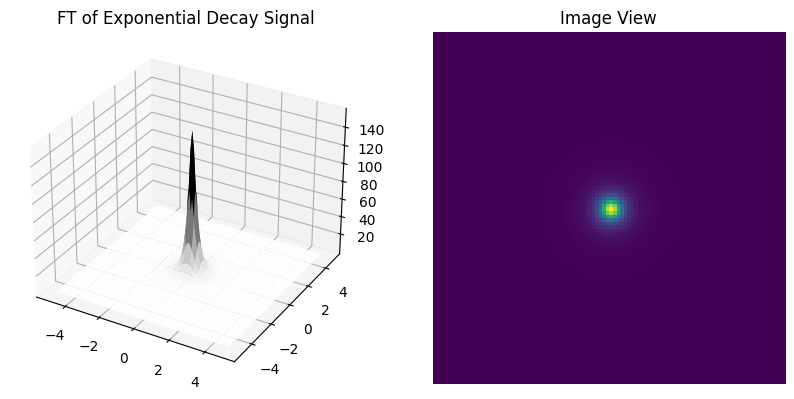

In [166]:
fft_points = np.fft.fft2(Z)
fft_points_shifted = np.fft.fftshift(fft_points)
fft_points_shifted_absolute = abs(fft_points_shifted)

plot_function(X,Y,fft_points_shifted_absolute,title="FT of Exponential Decay Signal")